## Linear Algebra in Python @ Sejong University, Seoul

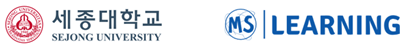

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your`NAME` and `STUDENT_ID`.

**NOTES**: Remove any `raise NotImplementedError()` code and replace with your code solution.

In [ ]:
NAME = ""
STUDENT_ID = ""

---

# Clustering in Python

*This example is suggested to be run using Google Colab or in your local PC.*

#### If using Google Colab, please run the following commands.

At first, import the drive package and mount you google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In the next cell, clone the repositoty to google drive:

In [ ]:
%%bash
cd /content/drive/MyDrive/
mkdir -p linearalgebra2025
cd linearalgebra2025
git clone https://github.com/justudin/la-clustering-example.git

## The $k$-means clustering algorithm

we can use the `Kmeans` function in the cluster module of the `sklearn` package from https://scikit-learn.org/

`Kmeans` : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
import warnings
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [ ]:
# import packages/libraries
from sklearn.cluster import KMeans
import numpy as np

# randomly generate data
data = np.concatenate([[0.3*np.random.randn(2) for i in range(100)], [[1,1] \
+ 0.3*np.random.randn(2) for i in range(100)], [[1,-1] \
+0.3* np.random.randn(2) for i in range(100)]])

# apply k-means with k=3
k=3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
labels = kmeans.labels_
print('labels:', labels)
group_representative = kmeans.cluster_centers_
print('group_representative:', group_representative)
J_clust = kmeans.inertia_
print('J_clust:', J_clust)

Here we try to apply the k-means algorithm on `data`, clustering the vectors into `k=3 groups`. Note that the `sklearn.cluster.KMeans` function initialize the algorithms with random centroids and thus the initial values of centroids are not required as an argument but the random state to draw the random initialization is.

## Examples
We apply the algorithm on a randomly generated set of N = 300 points, shown in Figure 4.1. These points were generated as follows.

In [ ]:
import matplotlib.pyplot as plt
plt.ion()

# randomly generate data
data = np.concatenate([[0.3*np.random.randn(2) for i in range(100)], [[1,1] \
+ 0.3*np.random.randn(2) for i in range(100)], [[1,-1] \
+0.3* np.random.randn(2) for i in range(100)]])

# plot the data with color black
plt.scatter(data[:,0],data[:,1], c='black')
# set x and y limit value (start, end)
plt.xlim(-1.5,2.5)
plt.ylim(-2,2.5)
# set the title in the bottom y=-0.18
plt.title("Figure 4.1. 300 points in a plane.", y=-0.18)
# show the plot
plt.show()

On the first line, we import the `matplotlib` package for plotting. Then we generate three arrays of vectors. Each set consists of 100 vectors chosen randomly around one of the three points (0,0),(1,1), and (1,-1). The three arrays are concatenated using `np. concatenate()` to get an array of 300 points. Next, we apply the `KMeans` function and make a figure with the three clusters (Figure 4.2).

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# apply k-means, with k=3 (three groups/clusters)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
labels = kmeans.labels_
group_representative = kmeans.cluster_centers_
J_clust = kmeans.inertia_
grps = [[data[i,:] for i in range(300) if labels[i]==j] for j in range(3)]

# plot the cluster results for each group assigned different color
plt.scatter([c[0] for c in grps[0]],[c[1] for c in grps[0]])
plt.scatter([c[0] for c in grps[1]],[c[1] for c in grps[1]])
plt.scatter([c[0] for c in grps[2]],[c[1] for c in grps[2]])
# set x and y limit value (start, end)
plt.xlim(-1.5,2.5)
plt.ylim(-2,2)
# set the title in the bottom y=-0.18
plt.title("Figure 4.2. Final clustering results.", y=-0.18)
# show the plot
plt.show()

**Animated version of kmeans**. Let's use the data above and create the kmeans animated version to get the idea how this kmeans clustering work, visually.

In [ ]:
# import the KmeansAnimate2D library
import KmeansAnimate2D as animate

kmeans = animate.KmeansAnimate2D(k=3, data=data)
kmeans.animate_jupyter_nb() # to show animation in a jupyter notebook

## Applications

## 1. Image Compression

The goal is to use k-means clustering to compress the image to a lower level, reducing the size of the original image.
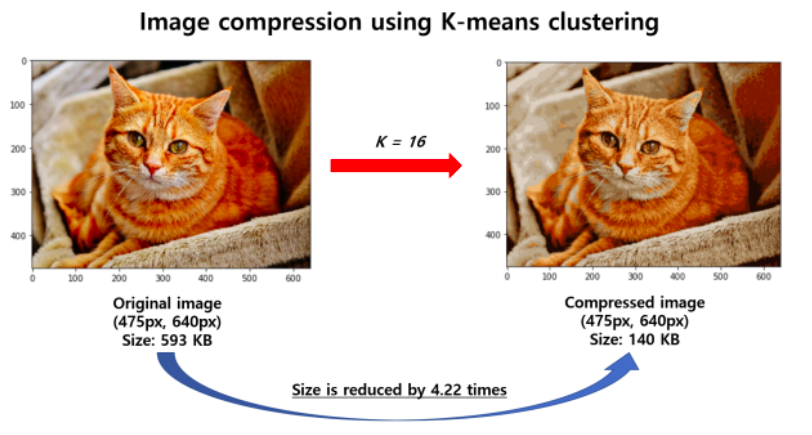

**How does the K-Means Clustering technique compress the image?**

In a colored image, each pixel is of size 3 bytes (RGB), where each color can have intensity values from 0 to 255. Following combinatorics, the total number of colors which can be represented is 256x256x256 (equal to 16,777,216). Practically, we can visualize only a few colors in an image very less than the above number. So the k-Means Clustering algorithm takes advantage of the visual perception of the human eye and uses few colors to represent the image. Colors having different values of intensity that are RGB values seem the same to the human eye. The K-Means algorithm takes this advantage and clubs similar looking colors (which are close together in a cluster). Here’s an illustration of how this works:

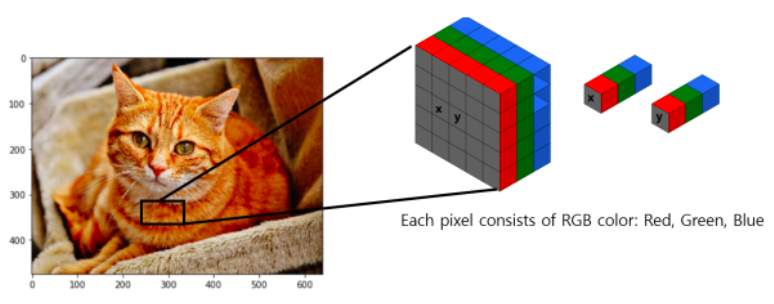

It is observed that for some amount of changes in the RGB values the color resembles the same to a human eye. So k-Means clustering can group these two colors together and can be represented by a centroid point that has almost the same resemblance to a human eye.

If we have an image with initial dimension is 475x640 pixels. For each pixel, the image has 3-dimension representing RGB intensity values. The RGB intensity values range from 0 to 255. Since intensity value has 256 values (2**8), so the storage required to store each pixel value is 3x8 bits. The initial size of the image will be (475x640x3x8) bits.

Total number of color combination equals (256x256x256) ( equal to 16,777,216). As the human eye is not able to perceive so many numbers of colors at once, so the idea is to group similar colors together and use fewer colors to represent the image.

We will be using k-Means clustering to find k number of colors which will be representative of its similar colors. These k-colors will be centroid points from the algorithm. Then we will replace each pixel value with its centroid points. The color combination formed using only k values will be very less compared to the total color combination. We will try different values of k and observe the output image.

Several libraries will be used in this practice, including:
- skimage: https://scikit-image.org/
- sklearn: https://scikit-learn.org/stable/
- matplotlib: https://matplotlib.org/
- numpy: https://numpy.org/

In [ ]:
# run this if you haven't install the required libraries
# remove # symbol
#!pip install scikit-image # to install skimage
#!pip install scikit-learn # to install sklearn
#!pip install matplotlib # to install matplotlib
#!pip install numpy # to install numpy

In [ ]:
# load the libraries
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

#enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written
%matplotlib inline 

In [ ]:
# reading the cat image
cat_img = io.imread('cat.png')

In [ ]:
# display the cat image
io.imshow(cat_img);

In [ ]:
# show the shape of the cat_img
cat_img.shape

In [ ]:
# display the cat_img data
cat_img

In [ ]:
# define pre-processing image function
def preprocess_img(image):
    # get the height and width of the image
    rows, cols = image.shape[0], image.shape[1]
    
    # Gives a new shape to an array without changing its data.
    # Docs: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
    # reshape the image into a rows*cols with 3 columns array so that each row represents a pixel and the three columns represent the Red, Green, and Blue values.
    image = image.reshape(rows * cols, 3)
    
    return image, rows, cols

In [ ]:
# call the preprocess_img function
preprocessed_img, rows, cols  = preprocess_img(cat_img)

In [ ]:
# show the shape of the preprocessed_img
preprocessed_img.shape

In [ ]:
# display the preprocessed_img data
preprocessed_img

In [ ]:
# define image_compression function
def image_compression(size, image):
    # size is the number of clusters
    kmeans = KMeans(n_clusters = size)
    # fit the data
    kmeans.fit(image)
    # Replace each pixel value with its nearby centroid:
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    # Clip (limit) the values in an array
    # Docs: https://numpy.org/doc/stable/reference/generated/numpy.clip.html
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
    
    return compressed_image

In [ ]:
# run the image compression using k-means clustering algorithm
k_size = 16 # size/number of clusters
compressed_img = image_compression(k_size, preprocessed_img)

In [ ]:
compressed_img.shape

In [ ]:
# reshape the array to it's original shape (rows, cols, 3)
compressed_img = compressed_img.reshape(rows, cols, 3)

compressed_img.shape

In [ ]:
# Save and display output image:
io.imsave('cat_compressed_%s.png' % (k_size), compressed_img)

# display the compressed image
io.imshow(compressed_img)

In [ ]:
# display the original image
io.imshow(cat_img)

In [ ]:
# check the file size of original image with the compressed one
import os

original_img_size = os.path.getsize('cat.png')
compressed_img_size = os.path.getsize('cat_compressed_%s.png' % (k_size))

print("Original image size is:", original_img_size/1000, "KB")
print("Compressed image size is:", compressed_img_size/1000, "KB")
reduced_by = round(original_img_size/compressed_img_size,2)
print("The size is reduced by", reduced_by,"times")

## 2. Image Classification

Yes! K-Means Clustering can be used for Image Classification of MNIST dataset. Here’s how.

K-means clustering is an unsupervised learning algorithm which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest centroid. The algorithm aims to minimize the squared Euclidean distances between the observation and the centroid of cluster to which it belongs.

K-Means clustering is not limited to the consumer information and population scientist. It can be used for Imagery analysis as well. Here we would use K-Means clustering to classify images of MNIST dataset.

### Getting to know the data

The MNIST dataset is loaded from keras (if you have tensorflow installed already). But in this case, we'll load the data from a file.

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# we'll load from a file called 'mnist.npz'
# mnist load_data
def mnist_load_data(file='mnist.npz'):
    with np.load(file, allow_pickle=True) as f:
        x_train, y_train = f["x_train"], f["y_train"]
        x_test, y_test = f["x_test"], f["y_test"]
        return (x_train, y_train), (x_test, y_test)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist_load_data()

The MNIST dataset is a benchmark dataset in the machine learning community which consists of 28 x 28 pixel images of digits from 0 to 9. Let us get to know more about the dataset.

In [ ]:
# Checking the ‘type’
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

All of them are numpy arrays.

In [ ]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

The output is (60000,28,28), (10000,28,28), (60000,1), (10000,1). The ‘x_train’ and ‘x_test’ consist of 60000 and 10000 monochrome images respectively . The pixel size of each image is 28 x 28.

Every input image has an output which is the number displayed in the image. Thus ‘y_train’ and ‘y_test’ are of size (60000,1) and (10000,1).

In [ ]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

Initially all the images were of different pixel sizes. Through Image Scaling they have been reduced to a common pixel size of 28 x 28. The details of the image are lost due to reduction in pixel size and hence the images are blurred.


In [ ]:
# Printing examples in 'y_train'
for i in range(5):
    print(y_train[i])

The output is 5,0,4,1,9. The ‘y_train’ and ‘y_test’ are digits from 0 to 9 which indicate the number displayed in image.


### Preprocessing the Data

In [ ]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

The minimum and maximum values are 0 and 255 respectively. In the RGB color space the red, green and blue use 8 bits each which have integer values from 0 to 255. So the total number of possible colors is 256*256*256 = 16777216. Sounds astonishing?

Since the dataset contains a range of values from 0 to 255, the dataset has to be normalized. Data Normalization is an important preprocessing step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This fastens the process of covergence while training the model. Also Normalization makes sure no one particular parameter influences the output significantly.

Data normalization is done by subtracting the mean from each pixel and then dividing the result by the standard deviation. The distribution of such data would resemble a Gaussian curve centered at zero. For image inputs we need the pixel numbers to be positive. So the image input is divided by 255 so that input values are in range of [0,1].

In [ ]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

Now we again check the minimum and maximum values of input.



In [ ]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

The minimum and maximum values are 0 and 1 respectively. The input data is in range of [0,1].

The input data have to be converted from 3 dimensional format to 2 dimensional format to be fed into the K-Means Clustering algorithm. Hence the input data has to be reshaped.

In [ ]:
# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

Now let us check the shape of ‘X_train’ and ‘X_test’.

In [ ]:
# Checking the shape
print(X_train.shape)
print(X_test.shape)

The output is (60000,784) and (10000,784). (28 x 28 = 784)

Now that preprocessing of data is done, we move ahead to building of model with Mini Batch K-Means: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html.

### Building the model

Mini Batch K-Means works similarly to the K-Means algorithm. The difference is that in mini-batch k-means the most computationally costly step is conducted on only a random sample of observations as opposed to all observations. This approach can significantly reduce the time required for the algorithm to find convergence with only a small cost in quality.



In [ ]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

The model has been fit to the training data. Now we run the kmeans.labels_

In [ ]:
kmeans.labels_

The images are classified into clusters based on similarity of pixel values. Each image is assigned a cluster label value given by kmeans.labels_. So kmeans.labels_ is an array of length 60000 as there are 60000 images in the training set.

But the kmeans.labels_ only denotes the cluster to which the image belongs to. It doesn’t denote the number displayed in image. Hence we write a separate function to retrieve the necessary information from kmeans.labels_

In [ ]:
def retrieve_info(cluster_labels,y_train):
    '''Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    '''
    # Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

Let us look at ‘reference_labels’.

In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
print(reference_labels)

If the output is :-
{0: 8, 1: 1, 2: 2, 3: 1, 4: 6, 5: 7, 6: 4, 7: 3, 8: 0, 9: 9} (i.e A cluster label of 0 is a cluster of images of 8, a cluster label of 1 is a cluster of images of 1 and so on).

It can be seen that cluster labels of 1 and 3 both denote the cluster of images of 1 and none of the cluster labels denote the cluster of images of 5. These can be solved by optimizing which would be discussed later in the article.

We run the ‘retrieve_info’ function and process it to get ‘number_labels’ which denotes the number displayed in image.

In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

Now we print the predicted ‘number_label’ and the actual label for the first 20 training examples.

In [ ]:
# Comparing Predicted values and Actual values
print('predicted:', number_labels[:20].astype('int'))
print('actual label:', y_train[:20])

In [ ]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

The accuracy score is about 55%.

Now let us optimize the algorithm for better results.

### Optimizing the Algorithm

The performance of model is measured by the following 3 metrics :- Inertia, Homogeneity score and Accuracy score.

Inertia is a measure of how internally coherent clusters are. It is inversely proportional to sum of squares of distances between data points and their respective cluster’s centroid. Higher the number of clusters, lower is the inertia score.

In clustering, a data point can belong to more than one cluster with some probability or likelihood value. The data points at the borderline of clusters can belong to more than 1 cluster. Homogeneity is a measure of data points of a particular cluster belonging to a single class.

Accuracy score is the percentage of correctly predicted values.

We define a function that calculates metrics for the model.

In [ ]:
# Function to calculate metrics for the model
def calculate_metrics(model,output):
    print('Number of clusters is {}'.format(model.n_clusters))
    print('Inertia : {}'.format(model.inertia_))
    print('Homogeneity : {}'.format(metrics.homogeneity_score(output,model.labels_)))

Now we run the model for different values of ‘number of clusters’.


In [ ]:
from sklearn import metrics
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
    total_clusters = len(np.unique(y_test))
    # Initialize the K-Means model
    kmeans = MiniBatchKMeans(n_clusters = i)
    # Fitting the model to training set
    kmeans.fit(X_train)
    # Calculating the metrics

    calculate_metrics(kmeans,y_train)
    # Calculating reference_labels
    reference_labels = retrieve_info(kmeans.labels_,y_train)
    # ‘number_labels’ is a list which denotes the number displayed in image
    number_labels = np.random.rand(len(kmeans.labels_))
    for i in range(len(kmeans.labels_)):
        number_labels[i] = reference_labels[kmeans.labels_[i]]
    print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
    print('\n')

It can be observed that as the number of clusters increases,

1. The inertia score decreases because sum of squares of distances between data points and their respective cluster’s centroid decreases and clusters become more internally coherent.

2. The homogeneity score increases the clusters become more differentiable and number of data points having a single class label is high.

3. The accuracy score increases. The reason will be discussed later in the article.

The accuracy is highest for ‘number of clusters’ = 256. Hence we run the model on the testing set for number of clusters = 256.

In [ ]:
# Testing model on Testing set
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = 256)
# Fitting the model to testing set
kmeans.fit(X_test)
# Calculating the metrics
calculate_metrics(kmeans,y_test)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

The accuracy score on training and testing set are very similar and close to 90% which suggests the model is not overfitting the training data and can be generalized well to new data.

A question to ponder is that why do we need 256 clusters when there are only 10 digits. This is because there can be multiple ways to write a particular number. The orientation and style of writing a number can be different and thus the algorithm views them as drastically different images. Hence we need more than 1 cluster to represent the images of a particular number.

The above point can be verified by Visualizing the centroids of each cluster.

### Visualization of Cluster Centroids
Each cluster has a centroid which is the most representative point of the cluster. If we can visualize the cluster centroid, we can get an idea of the other images in the cluster.

In [ ]:
# Cluster centroids is stored in ‘centroids’
centroids = kmeans.cluster_centers_

Let us look at the shape of ‘centroids’.



In [ ]:
centroids.shape

The ‘centroids’ is of shape (256,784). There are 256 cluster centroids and each cluster centroid has 784 features.

We reshape the centroids from 2 dimensional format to 3 dimensional format so that we can view them as images.

In [ ]:
centroids = centroids.reshape(256,28,28)

We had normalized the data. So now we nullify the normalization effect by multiplying by 255.

In [ ]:
centroids = centroids * 255

Now let us visualize the cluster centroids.



In [ ]:
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
    plt.imshow(centroids[i])

Each image is a cluster centroid image. It can be seen that there are 5 clusters which denote the number 4. The style and orientation of all 5 cluster centroid images are different.

Suppose there are 2 images A and B which denote 2 different numbers but have the same style. If the number of clusters was less, the 2 images A and B would be clustered together. This decreases the accuracy of the model.

A particular number can be written in different styles and orientations. Increasing the number of clusters helps to assign a separate cluster to each style and orientation. This improves the accuracy of the model.

### Predicting number displayed in user input image
The K-Means clustering model runs successfully on the MNIST data with an accuracy of 90%. But can it be used to predict other hand written images? Let us try to find out.

Load new image/input and resize the size to 28x28

In [ ]:
from PIL import Image

# open new image
image = Image.open('number4.jpg')
print(f"Original size : {image.size}")
# resize it into 28x28
sunset_resized = image.resize((28, 28))
sunset_resized.save('number4_28x28.jpg')

In [ ]:
# Reading the image
image = plt.imread('number4_28x28.jpg')
plt.imshow(image)

In [ ]:
image.shape

The shape is (28, 28, 3) which suggests it is a RGB image as there are 3 channels. The RGB image is converted to monochrome image as all images in MNIST data set are monochrome images.


In [ ]:
# RGB image is converted to Monochrome image
from skimage import color
from skimage import io
image = color.rgb2gray(io.imread('number4_28x28.jpg'))

The ‘image’ is reshaped into a single row vector to be fed into K-Means clustering algorithm.



In [ ]:
# Reshaping into a row vector
image = image.reshape(1,28*28).astype('float32')

Load the data to create a kmeans model

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist_load_data()

In [ ]:
print(x_train.min())
print(x_train.max())
print(image.min())
print(image.max())

In [ ]:
# Normalization of ‘x_train’
x_train = x_train.astype('float32')
x_train = x_train/255.0

In [ ]:
# Reshaping of ‘x_train’
x_train = x_train.reshape(len(x_train),28*28)

The model is trained.

In [ ]:
# Training the model
kmeans = MiniBatchKMeans(n_clusters=256)
kmeans.fit(x_train)

In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

In [ ]:
predicted_cluster = kmeans.predict(image)

In [ ]:
number_labels[[predicted_cluster]]

The model can be used predict new input/image, the number displayed in ‘image’.

```
MNIST dataset license:
      Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
      which is a derivative work from original NIST datasets.
      MNIST dataset is made available under the terms of the
      [Creative Commons Attribution-Share Alike 3.0 license.](
      https://creativecommons.org/licenses/by-sa/3.0/)
    """
```

### Want more application? 
Try this code: https://github.com/snymanje/MultiClass-Text-Classification-Unsupervised

## That's all for today! Any questions?

### Next week is HOLIDAY. Enjoy your time with family and friends :)

### Next class:
- We'll learn about Linear independence
- Please read Chapter 5 - Linear independence

*See you and have a nice day!*